<a href="https://colab.research.google.com/github/ClovisMonteiro/Titanic_Machine_Learning/blob/master/Titanic_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic



## Estudo de caso do naufrágio do titanic

Esse é o desafio mais popular do kaggle.com, atualmente pode ser considerado como o "hello, world!" da área de Data Science. 
Os dados são reais e são disponibilizados pelo kaggle. 
Apesar da tecnologia disponível, após colidir com um iceberg em 15 de abril de 1912, seu naufrágio matou 1502 pessoas de um total de 2224 passageiros.
O intuito desse projeto no Kaggle é simplesmente ensinar um modelo a reconhecer por meio de parametros, quais passageiros sobreviveram ou não.


## Exploração dos Dados

Em uma análise inicial, serão estudadas cada variável. É importante verificar seu nome, tipo, porcentagem de valores faltantes, presença de outliers e tipo de distribuição.

# Dicionário dos Dados


# Analisando os dados

1.   PassengerId: Número de identificação do passageiro
2.   Survived: Informa se o passageiro sobreviveu ao desastre[0 = Não / 1 = Sim]
3.   Pclass: Classe do bilhete [1 = 1ª Classe / 2 = 2ª Classe / 3 = 3ª Classe]
4.   Name: Nome do passageiro
5.   Sex: Sexo do passageiro
6.   Age: Idade do passageiro
7.   SibSp: Quantidade de cônjuges e irmãos a bordo
8.   Parch: Quantidade de pais e filhos a bordo
9.   Ticket: Número da passagem
10.  Fare: Preço da Passagem
11.  Cabin: Número da cabine do passageiro
12.  Embarked: Porto no qual o passageiro embarcou

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier

Populating the interactive namespace from numpy and matplotlib


In [0]:
train = pd.read_csv("C:\\Users\\clovis.estagio\\Desktop\\titanic\\train.csv")
test = pd.read_csv("C:\\Users\\clovis.estagio\\Desktop\\titanic\\test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff80b8f8c50>,
      dtype=object)

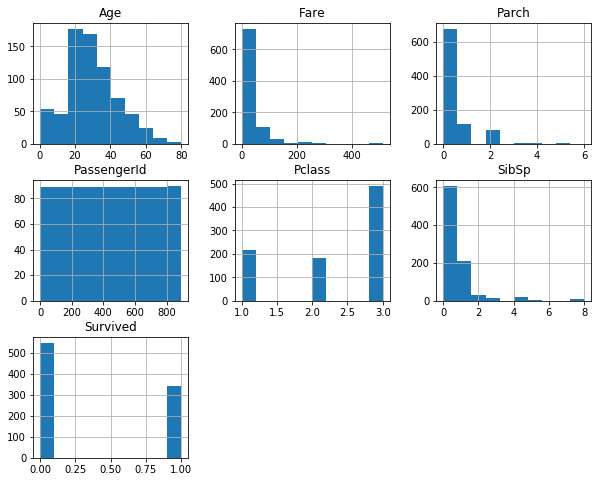

In [11]:
#histogramas com variavis numericas
train.hist(figsize=(10,8))

In [13]:
#Probailidade de sobrevivencia analisando o sexo
train[['Sex', 'Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.742038
male,0.188908


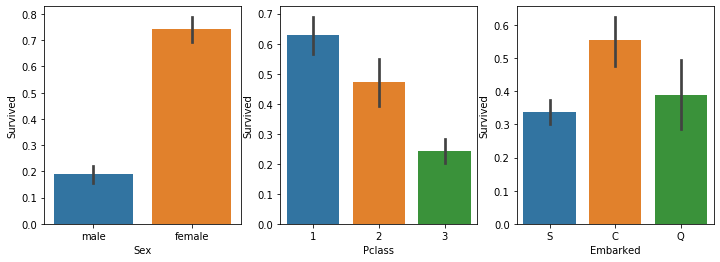

In [16]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig, (axis1, axis2, axis3) = plt.subplots(1,3, figsize=(12,4))

sns.barplot(x='Sex', y='Survived', data=train, ax=axis1)
sns.barplot(x='Pclass', y='Survived', data=train, ax=axis2)
sns.barplot(x='Embarked', y='Survived', data=train, ax=axis3);

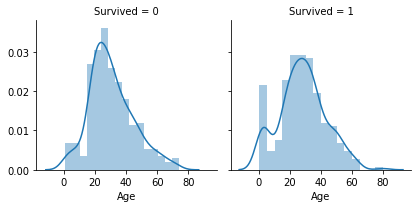

In [17]:
# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(train, col='Survived')
age_survived.map(sns.distplot, 'Age')

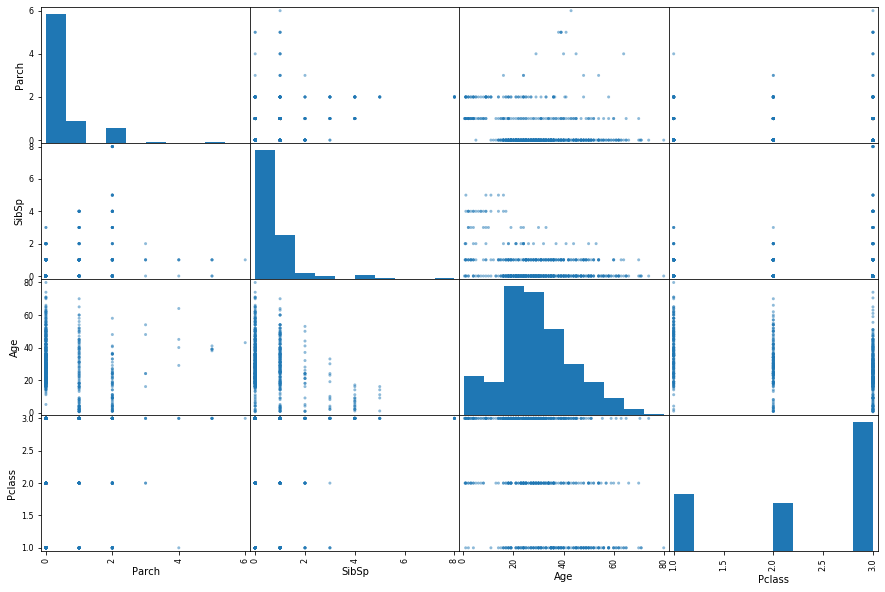

In [18]:
# plotar uma scatter matrix
columns=['Parch', 'SibSp', 'Age', 'Pclass']
pd.plotting.scatter_matrix(train[columns], figsize=(15, 10));

# Preparação dos Dados

In [0]:
def transformar_sexo(valor):
    if valor == 'female':
        return 1
    else:
        return 0
    
train['Sex_binario'] = train['Sex'].map(transformar_sexo)

In [0]:
variaveis = ['Sex_binario', 'Age']
x = train[variaveis]
y = train['Survived']

In [0]:
x.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [0]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [0]:
x = x.fillna(-1)
modelo.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
test['Sex_binario'] = test['Sex'].map(transformar_sexo)

In [0]:
x_prev = x_prev.fillna(-1)
x_prev.head()

,Sex_binario,Age
0,0,22.0
1,1,38.0
2,1,26.0
3,1,35.0
4,0,35.0


In [0]:
x_prev = test[variaveis]

In [0]:
np.random.seed(1)
x_treino, x_valid, y_treino, y_valid = train_test_split(x,y, test_size = 0.5)

In [0]:
x_treino.shape, x_valid.shape, y_treino.shape, y_valid.shape

((445, 2), (446, 2), (445,), (446,))

In [0]:
#RandomForestClassifier = Conjunto de pequenos modelos de arvores de decisão, só trabalha com 0 e 1
modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state = 0)
modelo.fit(x_treino, y_treino)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
p = modelo.predict(x_valid)

In [0]:
#acuracia
np.mean(y_valid == p)

0.7466367713004485

In [0]:
p = (x_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

In [0]:
p = (x_valid['Sex_binario'] == 1).astype(np.int64)
np.mean(y_valid == p)

0.7623318385650224

In [0]:
sub = pd.Series(p, index = test['PassengerId'], name = "Survived" )

In [0]:
sub.shape

(418,)

In [0]:
x_falso= np.arange(10)
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
np.random.seed(0)
train_test_split(x_falso, test_size = 0.5)

[array([6, 7, 3, 0, 5]), array([2, 8, 4, 9, 1])]

In [0]:
x_treino.head()

,Sex_binario,Age
394,1,24.00
851,0,74.00
373,0,22.00
523,1,44.00
78,0,0.83


In [0]:
sub.to_csv("C:\\Users\\clovis.estagio\\Desktop\\titanic\\Primeiro_modelo.csv", header=True)

# Validação Cruzada

In [0]:
x_falso

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
#AVALIAÇÕES DAS ACURÁCIAS
resultados = []

for rep in range(10):
    print("Rep: ", rep)
    kf = KFold(2,  shuffle=True, random_state=rep)

    for linhas_treino, linhas_teste in kf.split(x):
        print("Treino: ", linhas_treino.shape[0])
        print("Valid:  ", linhas_teste.shape[0])
        print()

        x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_teste]
        y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_teste]

        modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state = 0)
        modelo.fit(x_treino, y_treino)

        p = modelo.predict(x_valid)
        acc = np.mean(y_valid == p)
        resultados.append(acc)
        print("Acc: ", acc)
        
        #print(x_treino.head())

Rep:  0
Treino:  445
Valid:   446

Acc:  0.7713004484304933
Treino:  446
Valid:   445

Acc:  0.7797752808988764
Rep:  1
Treino:  445
Valid:   446

Acc:  0.7443946188340808
Treino:  446
Valid:   445

Acc:  0.7955056179775281
Rep:  2
Treino:  445
Valid:   446

Acc:  0.7757847533632287
Treino:  446
Valid:   445

Acc:  0.7887640449438202
Rep:  3
Treino:  445
Valid:   446

Acc:  0.7533632286995515
Treino:  446
Valid:   445

Acc:  0.7573033707865169
Rep:  4
Treino:  445
Valid:   446

Acc:  0.7354260089686099
Treino:  446
Valid:   445

Acc:  0.7415730337078652
Rep:  5
Treino:  445
Valid:   446

Acc:  0.7219730941704036
Treino:  446
Valid:   445

Acc:  0.7056179775280899
Rep:  6
Treino:  445
Valid:   446

Acc:  0.7757847533632287
Treino:  446
Valid:   445

Acc:  0.7303370786516854
Rep:  7
Treino:  445
Valid:   446

Acc:  0.7040358744394619
Treino:  446
Valid:   445

Acc:  0.7348314606741573
Rep:  8
Treino:  445
Valid:   446

Acc:  0.7488789237668162
Treino:  446
Valid:   445

Acc:  0.788764044

In [0]:
np.mean(resultados)

0.7550007557817302

(array([2., 1., 1., 2., 3., 2., 1., 3., 2., 3.]),
 array([0.70403587, 0.71318285, 0.72232982, 0.7314768 , 0.74062377,
        0.74977075, 0.75891772, 0.76806469, 0.77721167, 0.78635864,
        0.79550562]),
 <a list of 10 Patch objects>)

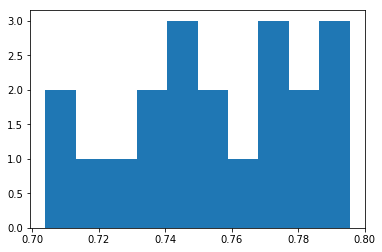

In [0]:
pylab.hist(resultados)

In [0]:
np.mean(resultados)

0.7550007557817302

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


# Novas Variáveis

modelo anterior = 0.7550007557817302

In [0]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [0]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp','Parch', 'Fare' ]

In [0]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_treino, y_treino)

    p = modelo.predict(x_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247



Analise ERRO

In [0]:
resultados = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(x):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    x_treino, x_valid = x.iloc[linhas_treino], x.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo.fit(x_treino, y_treino)

    p = modelo.predict(x_valid)

    acc = np.mean(y_valid == p)
    resultados.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.7511210762331838

Treino: 446
Valid: 445
Acc: 0.7617977528089888

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7399103139013453

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7354260089686099

Treino: 446
Valid: 445
Acc: 0.797752808988764

Treino: 445
Valid: 446
Acc: 0.7690582959641256

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7757847533632287

Treino: 446
Valid: 445
Acc: 0.7573033707865169

Treino: 445
Valid: 446
Acc: 0.7556053811659192

Treino: 446
Valid: 445
Acc: 0.7640449438202247

Treino: 445
Valid: 446
Acc: 0.7443946188340808

Treino: 446
Valid: 445
Acc: 0.7595505617977528

Treino: 445
Valid: 446
Acc: 0.7533632286995515

Treino: 446
Valid: 445
Acc: 0.7640449438202247



In [0]:
X_valid_check = train.iloc[linhas_valid].copy()
X_valid_check['p'] = p
X_valid_check.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0


In [0]:
X_valid_check.shape

(445, 14)

In [0]:
erros = X_valid_check[X_valid_check['Survived'] != X_valid_check['p']]
erros = erros[['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Sex_binario', 'p', 'Survived']]
erros.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,1
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
23,24,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S,0,0,1
24,25,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,NaN,S,1,1,0
36,37,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C,0,0,1


In [0]:
mulheres = erros[erros['Sex'] == 'female']
homens = erros[erros['Sex'] == 'male']

In [0]:
mulheres.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
415,416,3,"Meek, Mrs. Thomas (Annie Louise Rowley)",female,NaN,0,0,343095,8.0500,NaN,S,1,1,0
404,405,3,"Oreskovic, Miss. Marija",female,20.0,0,0,315096,8.6625,NaN,S,1,1,0
882,883,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1,1,0
423,424,3,"Danbom, Mrs. Ernst Gilbert (Anna Sigrid Maria ...",female,28.0,1,1,347080,14.4000,NaN,S,1,1,0
474,475,3,"Strandberg, Miss. Ida Sofia",female,22.0,0,0,7553,9.8375,NaN,S,1,1,0
501,502,3,"Canavan, Miss. Mary",female,21.0,0,0,364846,7.7500,NaN,Q,1,1,0
502,503,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q,1,1,0
503,504,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,NaN,S,1,1,0
402,403,3,"Jussila, Miss. Mari Aina",female,21.0,1,0,4137,9.8250,NaN,S,1,1,0
593,594,3,"Bourke, Miss. Mary",female,NaN,0,2,364848,7.7500,NaN,Q,1,1,0


In [0]:
homens.sort_values("Survived")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_binario,p,Survived
59,60,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9000,NaN,S,0,1,0
771,772,3,"Jensen, Mr. Niels Peder",male,48.0,0,0,350047,7.8542,NaN,S,0,1,0
684,685,2,"Brown, Mr. Thomas William Solomon",male,60.0,1,1,29750,39.0000,NaN,S,0,1,0
731,732,3,"Hassan, Mr. Houssein G N",male,11.0,0,0,2699,18.7875,NaN,C,0,1,0
694,695,1,"Weir, Col. John",male,60.0,0,0,113800,26.5500,NaN,S,0,1,0
21,22,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S,0,0,1
599,600,1,"Duff Gordon, Sir. Cosmo Edmund (""Mr Morgan"")",male,49.0,1,0,PC 17485,56.9292,A20,C,0,0,1
604,605,1,"Homer, Mr. Harry (""Mr E Haven"")",male,35.0,0,0,111426,26.5500,NaN,C,0,0,1
621,622,1,"Kimball, Mr. Edwin Nelson Jr",male,42.0,1,0,11753,52.5542,D19,S,0,0,1
622,623,3,"Nakid, Mr. Sahid",male,20.0,1,1,2653,15.7417,NaN,C,0,0,1


# Etapa Final

In [0]:
train['Embarked_S'] = (train['Embarked'] == 'S').astype(int)
train['Embarked_C'] = (train['Embarked'] == 'C').astype(int)
#train['Embarked_Q'] = (train['Embarked'] == 'Q').astype(int)

train['Cabine_nula'] = train['Cabin'].isnull().astype(int)

train['Nome_contem_Miss'] = train['Name'].str.contains("Miss").astype(int)
train['Nome_contem_Mrs'] = train['Name'].str.contains("Mrs").astype(int)

train['Nome_contem_Master'] = train['Name'].str.contains("Master").astype(int)
train['Nome_contem_Col'] = train['Name'].str.contains("Col").astype(int)
train['Nome_contem_Major'] = train['Name'].str.contains("Major").astype(int)
train['Nome_contem_Mr'] = train['Name'].str.contains("Mr").astype(int)

In [0]:
variaveis

['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

In [0]:
variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare', 'Embarked_S', 'Embarked_C', 'Cabine_nula',
             'Nome_contem_Miss', 'Nome_contem_Mrs',
             'Nome_contem_Master', 'Nome_contem_Col', 'Nome_contem_Major', 'Nome_contem_Mr']

X = train[variaveis].fillna(-1)
y = train['Survived']

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
resultados2 = []
kf = RepeatedKFold(n_splits=2, n_repeats=10, random_state=10)

for linhas_treino, linhas_valid in kf.split(X):
    print("Treino:", linhas_treino.shape[0])
    print("Valid:", linhas_valid.shape[0])

    X_treino, X_valid = X.iloc[linhas_treino], X.iloc[linhas_valid]
    y_treino, y_valid = y.iloc[linhas_treino], y.iloc[linhas_valid]

    #modelo = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
    modelo = LogisticRegression()
    
    modelo.fit(X_treino, y_treino)

    p = modelo.predict(X_valid)

    acc = np.mean(y_valid == p)
    resultados2.append(acc)
    print("Acc:", acc)
    print()
    #print(X_treino.head())
    #print()

Treino: 445
Valid: 446
Acc: 0.8251121076233184

Treino: 446
Valid: 445
Acc: 0.8044943820224719

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.802247191011236

Treino: 445
Valid: 446
Acc: 0.8139013452914798

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8161434977578476

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.820627802690583

Treino: 446
Valid: 445
Acc: 0.8089887640449438

Treino: 445
Valid: 446
Acc: 0.827354260089686

Treino: 446
Valid: 445
Acc: 0.8157303370786517

Treino: 445
Valid: 446
Acc: 0.8430493273542601

Treino: 446
Valid: 445
Acc: 0.8067415730337079

Treino: 445
Valid: 446
Acc: 0.8094170403587444

Treino: 446
Valid: 445
Acc: 0.8134831460674158

Treino: 445
Valid: 446
Acc: 0.8452914798206278

Treino: 446
Valid: 445
Acc: 0.8179775280898877

Treino: 445
Valid: 446
Acc: 0.8295964125560538

Treino: 446
Valid: 445
Acc: 0.8292134831460675



((array([2., 3., 3., 5., 1., 2., 2., 0., 0., 2.]),
  array([0.80224719, 0.80655162, 0.81085605, 0.81516048, 0.81946491,
         0.82376934, 0.82807376, 0.83237819, 0.83668262, 0.84098705,
         0.84529148]),
  <a list of 10 Patch objects>),
 (array([2., 1., 3., 6., 4., 2., 1., 0., 0., 1.]),
  array([0.73542601, 0.74165869, 0.74789137, 0.75412405, 0.76035673,
         0.76658941, 0.77282209, 0.77905477, 0.78528745, 0.79152013,
         0.79775281]),
  <a list of 10 Patch objects>))

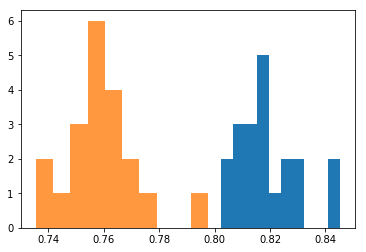

In [0]:
pylab.hist(resultados2), pylab.hist(resultados,alpha=0.8)

In [0]:
np.mean(resultados2)

0.8189613039754118

In [0]:
test['Embarked_S'] = (test['Embarked'] == 'S').astype(int)
test['Embarked_C'] = (test['Embarked'] == 'C').astype(int)
#test['Embarked_Q'] = (test['Embarked'] == 'Q').astype(int)

test['Cabine_nula'] = (test['Cabin'].isnull()).astype(int)

test['Nome_contem_Miss'] = test['Name'].str.contains("Miss").astype(int)
test['Nome_contem_Mrs'] = test['Name'].str.contains("Mrs").astype(int)

test['Nome_contem_Master'] = test['Name'].str.contains("Master").astype(int)
test['Nome_contem_Col'] = test['Name'].str.contains("Col").astype(int)
test['Nome_contem_Major'] = test['Name'].str.contains("Major").astype(int)
test['Nome_contem_Mr'] = test['Name'].str.contains("Mr").astype(int)

modelo = LogisticRegression()
modelo.fit(X, y)

p = modelo.predict(test[variaveis].fillna(-1))

Criando Submission

In [0]:
sub = pd.Series(p, index=test['PassengerId'], name='Survived')
sub.shape

(418,)

In [0]:
sub.to_csv("C:\\Users\\clovis.estagio\\Desktop\\titanic\\Segundo_modelo.csv", header=True)